In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from create_model import SALES_PATH, DEMOGRAPHICS_PATH, SALES_COLUMN_SELECTION, load_data

In [2]:
sales_demographic_data, target = load_data(SALES_PATH, DEMOGRAPHICS_PATH, SALES_COLUMN_SELECTION)

## Input

In [3]:
sales_demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedrooms                21613 non-null  int64  
 1   bathrooms               21613 non-null  float64
 2   sqft_living             21613 non-null  int64  
 3   sqft_lot                21613 non-null  int64  
 4   floors                  21613 non-null  float64
 5   sqft_above              21613 non-null  int64  
 6   sqft_basement           21613 non-null  int64  
 7   ppltn_qty               21613 non-null  float64
 8   urbn_ppltn_qty          21613 non-null  float64
 9   sbrbn_ppltn_qty         21613 non-null  float64
 10  farm_ppltn_qty          21613 non-null  float64
 11  non_farm_qty            21613 non-null  float64
 12  medn_hshld_incm_amt     21613 non-null  float64
 13  medn_incm_per_prsn_amt  21613 non-null  float64
 14  hous_val_amt            21613 non-null

### Rooms

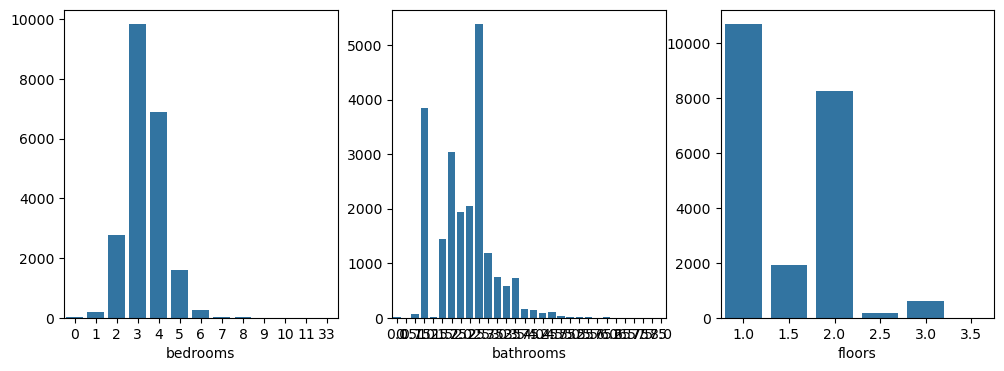

In [4]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

bedroom_count = sales_demographic_data["bedrooms"].value_counts()
bathrooms_count = sales_demographic_data["bathrooms"].value_counts()
floors_count = sales_demographic_data["floors"].value_counts()

sns.barplot(x=bedroom_count.index, y=bedroom_count.values, ax=axs[0])
sns.barplot(x=bathrooms_count.index, y=bathrooms_count.values, ax=axs[1])
sns.barplot(x=floors_count.index, y=floors_count.values, ax=axs[2])


plt.show()

### Sizes

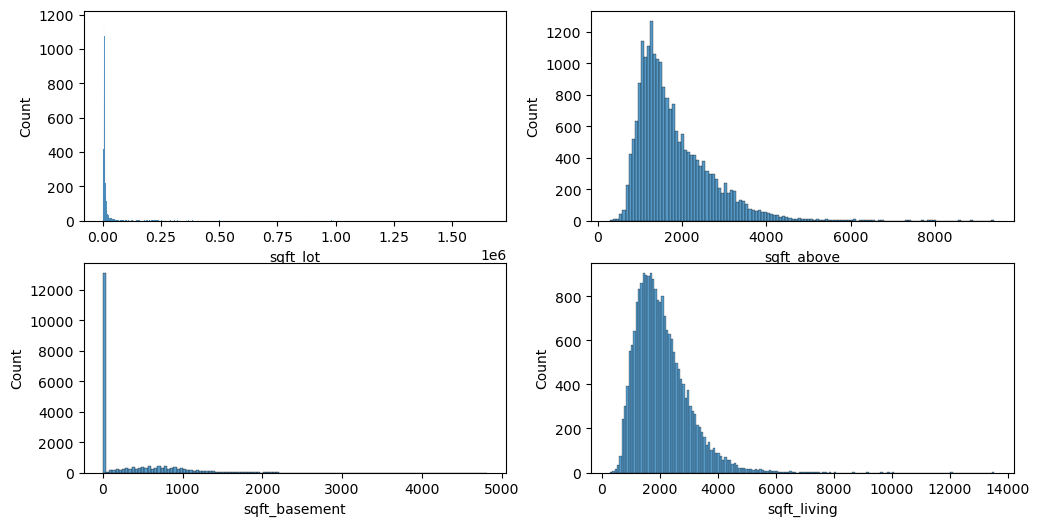

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))


sns.histplot(data=sales_demographic_data, x="sqft_lot", ax=axs[0, 0])
sns.histplot(data=sales_demographic_data, x="sqft_above", ax=axs[0, 1])
sns.histplot(data=sales_demographic_data, x="sqft_basement", ax=axs[1, 0])
sns.histplot(data=sales_demographic_data, x="sqft_living", ax=axs[1, 1])


plt.show()

### Education

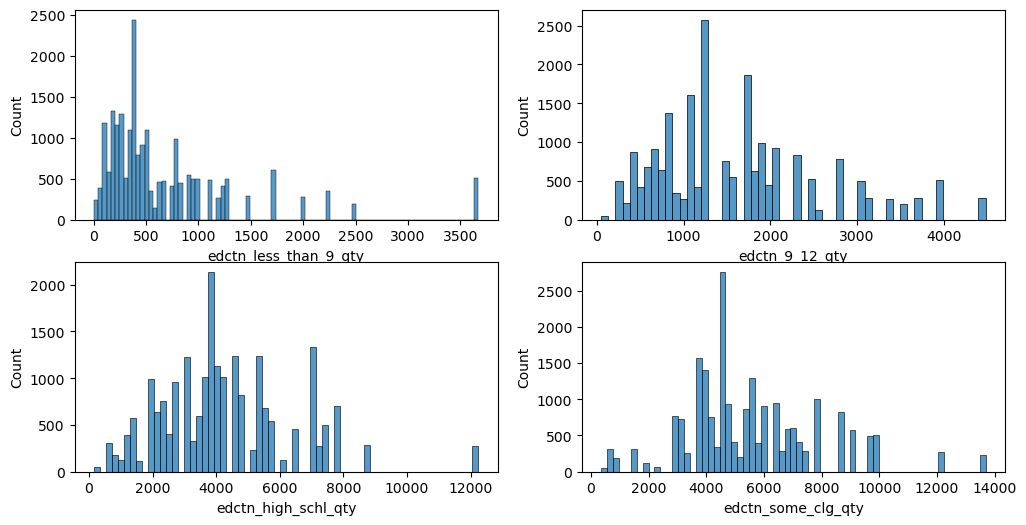

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))


sns.histplot(data=sales_demographic_data, x="edctn_less_than_9_qty", ax=axs[0, 0])
sns.histplot(data=sales_demographic_data, x="edctn_9_12_qty", ax=axs[0, 1])
sns.histplot(data=sales_demographic_data, x="edctn_high_schl_qty", ax=axs[1, 0])
sns.histplot(data=sales_demographic_data, x="edctn_some_clg_qty", ax=axs[1, 1])


plt.show()

### Per place of living

In [12]:
per_urbn_unique = np.unique(sales_demographic_data["per_urbn"].values)

print(len(per_urbn_unique))

16


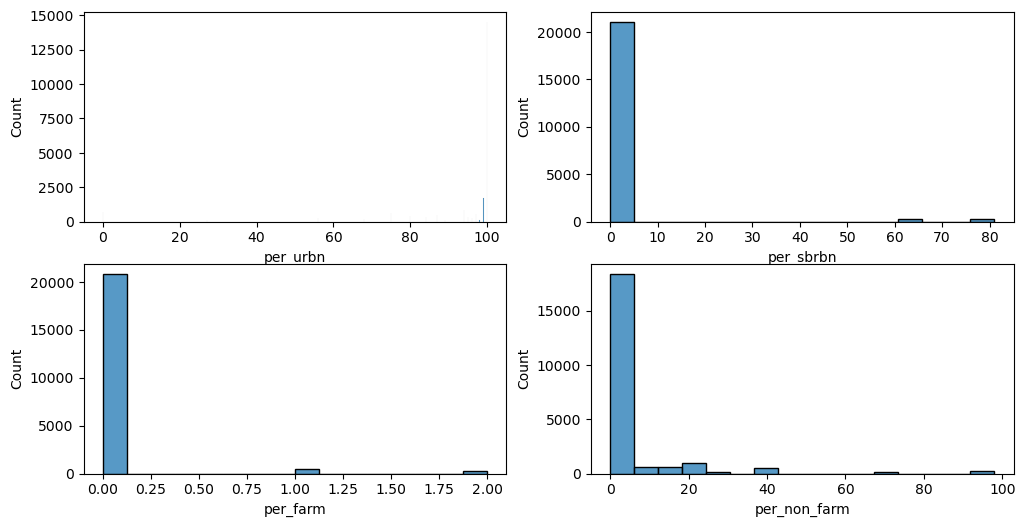

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))


sns.histplot(data=sales_demographic_data, x="per_urbn", ax=axs[0, 0])
sns.histplot(data=sales_demographic_data, x="per_sbrbn", ax=axs[0, 1])
sns.histplot(data=sales_demographic_data, x="per_farm", ax=axs[1, 0])
sns.histplot(data=sales_demographic_data, x="per_non_farm", ax=axs[1, 1])


plt.show()

### Per education

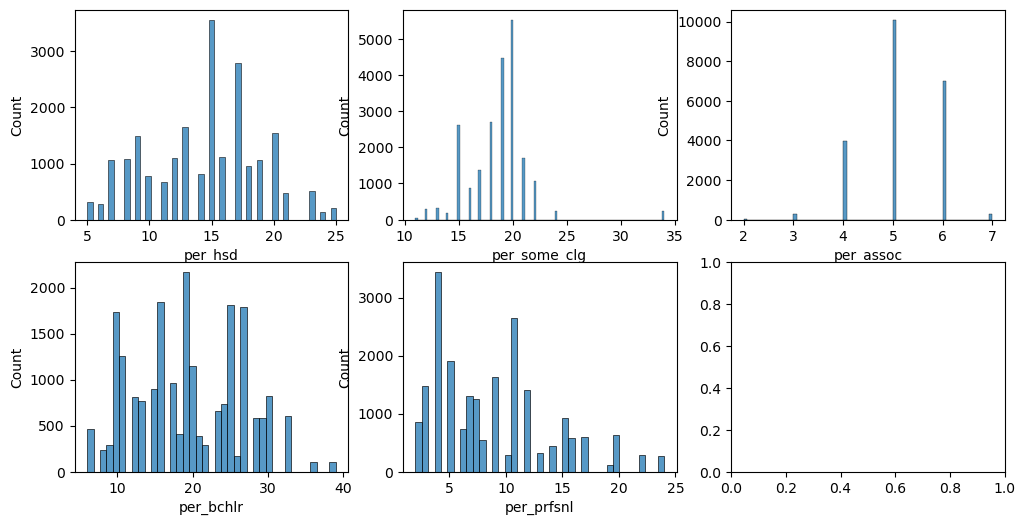

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))


sns.histplot(data=sales_demographic_data, x="per_hsd", ax=axs[0, 0])
sns.histplot(data=sales_demographic_data, x="per_some_clg", ax=axs[0, 1])
sns.histplot(data=sales_demographic_data, x="per_assoc", ax=axs[0, 2])
sns.histplot(data=sales_demographic_data, x="per_bchlr", ax=axs[1, 0])
sns.histplot(data=sales_demographic_data, x="per_prfsnl", ax=axs[1, 1])


plt.show()

### House hold income

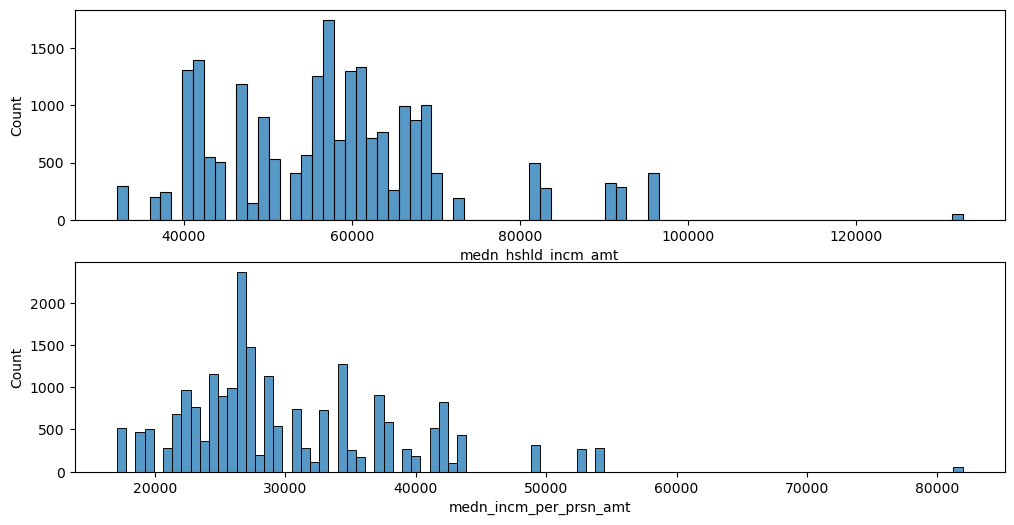

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))


sns.histplot(data=sales_demographic_data, x="medn_hshld_incm_amt", ax=axs[0])
sns.histplot(data=sales_demographic_data, x="medn_incm_per_prsn_amt", ax=axs[1])


plt.show()

### House valuation

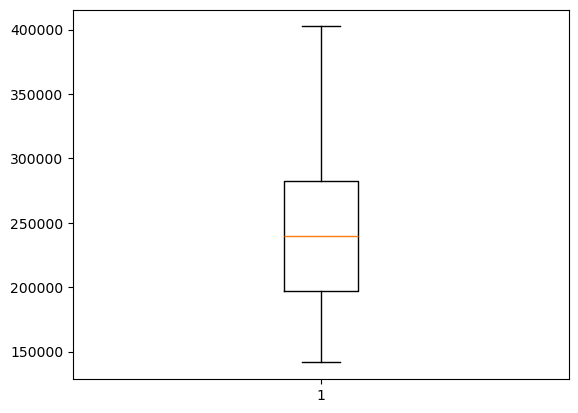

In [5]:
plt.boxplot(sales_demographic_data["hous_val_amt"], showfliers=False)

plt.show()

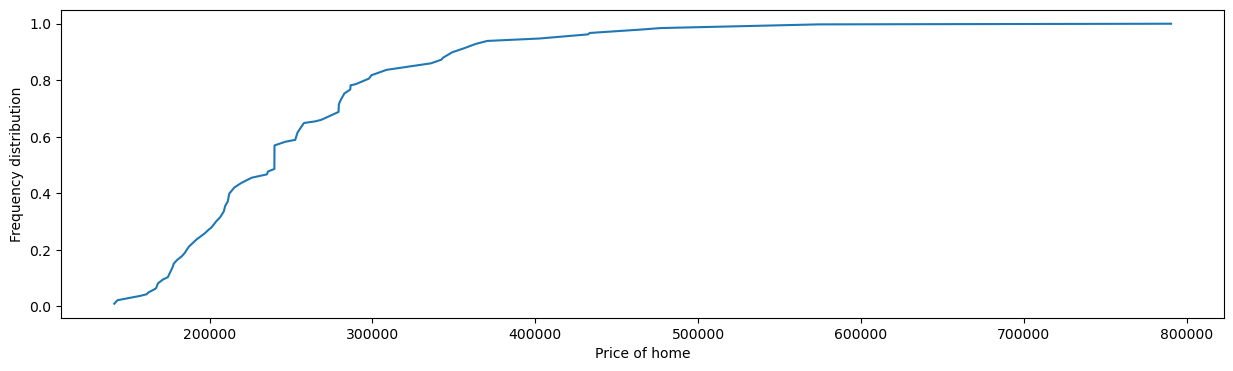

In [6]:
normalized_target = sales_demographic_data["hous_val_amt"].value_counts(normalize=True)

normalized_target_sorted = normalized_target.sort_index()

target_cumsum = np.cumsum(normalized_target_sorted)
index = target_cumsum.index

fig, ax = plt.subplots(figsize=(15, 4))

sns.lineplot(x=index, y=target_cumsum, ax=ax)

ax.set_xlabel("Price of home")
ax.set_ylabel("Frequency distribution")

plt.show()

## Output

In [6]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: price
Non-Null Count  Dtype  
--------------  -----  
21613 non-null  float64
dtypes: float64(1)
memory usage: 169.0 KB


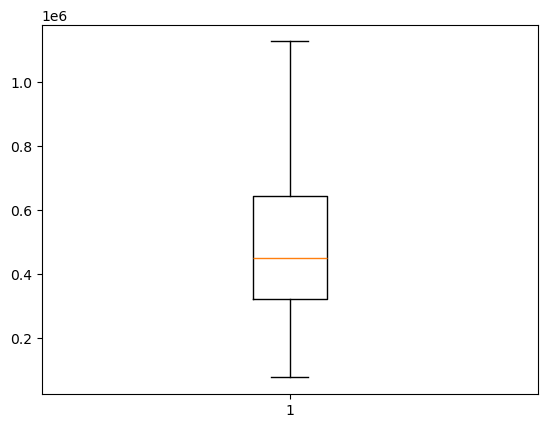

In [7]:
plt.boxplot(target, showfliers=False)

plt.show()

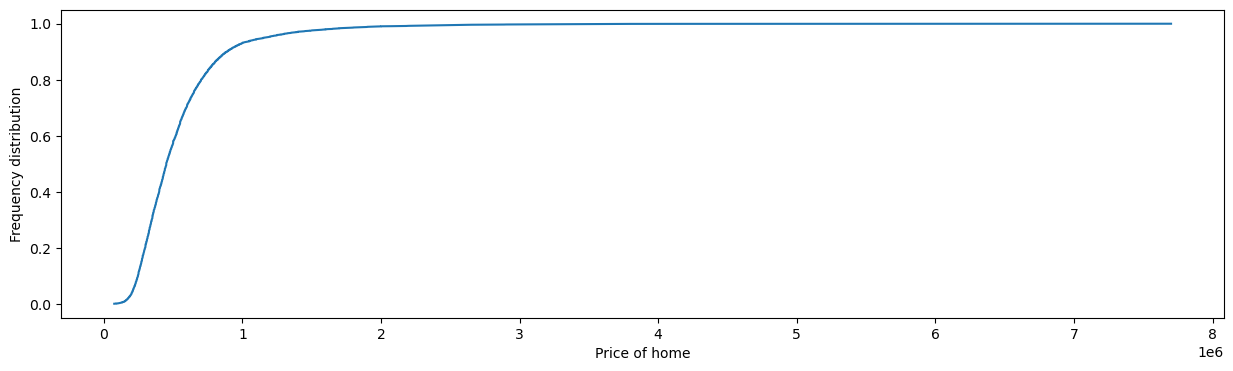

In [9]:
normalized_target = target.value_counts(normalize=True)

normalized_target_sorted = normalized_target.sort_index()

target_cumsum = np.cumsum(normalized_target_sorted)
index = target_cumsum.index

fig, ax = plt.subplots(figsize=(15, 4))

sns.lineplot(x=index, y=target_cumsum, ax=ax)

ax.set_xlabel("Price of home")
ax.set_ylabel("Frequency distribution")

plt.show()